In [6]:
import pandas as pd
import numpy as np
%pylab inline
rcParams['figure.figsize'] = 9, 7

Populating the interactive namespace from numpy and matplotlib


In [7]:
result_df =  pd.read_csv("results/importance.csv")

In [8]:
result_df[0:1]

,nsamples,nvars,mtry,ntrees,ncores,count,variable,importance
0,5000,2500000,0.1,100,64,0,v_1000,0.00052


In [9]:
importance_by_mtry = result_df.groupby(['mtry','variable']).max()[['importance']]
importance_by_mtry


importance
mtry variable             
0.10 v_10         0.000211
     v_100        0.000184
     v_1000       0.000520
     v_10000      0.000340
     v_100000     0.000469
     v_1904296    0.000005
     v_1904297    0.000004
     v_1904298    0.000004
     v_1904299    0.000003
     v_1904300    0.000004
     v_1904302    0.000004
     v_1904303    0.000004
     v_1904304    0.000003
     v_1904306    0.000003
     v_1904307    0.000003
     v_1904308    0.000003
     v_1904311    0.000004
     v_1904312    0.000003
     v_1904317    0.000004
     v_1904334    0.000003
0.25 v_10         0.000336
     v_100        0.000332
     v_1000       0.000888
     v_10000      0.000625
     v_100000     0.000942
     v_1904296    0.000009
     v_1904297    0.000007
     v_1904298    0.000007
     v_1904299    0.000006
     v_1904300    0.000005
...                    ...
0.50 v_1904301    0.000007
     v_1904302    0.000006
     v_1904303    0.000007
     v_1904304    0.000005
     v_1904305    0.000004
     v_1904307    0.000005
     v_1904308    0.000005
     v_1904309    0.000004
     v_1904313    0.000005
     v_1904322    0.000004
0.80 v_10         0.000578
     v_100        0.000621
     v_1000       0.001239
     v_10000      0.000932
     v_100000     0.001288
     v_1904296    0.000018
     v_1904297    0.000014
     v_1904298    0.000012
     v_1904299    0.000010
     v_1904300    0.000008
     v_1904301    0.000007
     v_1904302    0.000007
     v_1904303    0.000007
     v_1904304    0.000005
     v_1904305    0.000006
     v_1904307    0.000005
     v_1904309    0.000004
     v_1904311    0.000004
     v_1904312    0.000005
     v_1904314    0.000004

[80 rows x 1 columns]

In [12]:
effects = np.array([0.85, 0.9, 1.1, 1.0, 1.15])
effects_total = np.sum(effects)
#oob_and_duration_nested.groupby(level=[0]).apply(lambda x:x[0:5]/np.linalg.norm(x[0:5]))
def summarize(f):
    s = f['importance']
    total = s.sum()
    others = s[5:-1].sum()/total * effects_total
    values = s[0:5].values/total * effects_total
    labels = map(lambda a: "%s=%s"%a, zip(list(f.index.get_level_values(1)[0:5]), effects))
    return pd.DataFrame({'normalized_imp':list(values) + [others]}, labels + ['others'])
norm_importance_by_mtry = importance_by_mtry.groupby(level=[0]).apply(summarize)
norm_importance_by_mtry

normalized_imp
mtry                              
0.10 v_10=0.85            0.592952
     v_100=0.9            0.517927
     v_1000=1.1           1.460278
     v_10000=1.0          0.955534
     v_100000=1.15        1.319185
     others               0.145887
0.25 v_10=0.85            0.523468
     v_100=0.9            0.517647
     v_1000=1.1           1.385694
     v_10000=1.0          0.975027
     v_100000=1.15        1.470044
     others               0.121514
0.50 v_10=0.85            0.533917
     v_100=0.9            0.580265
     v_1000=1.1           1.370486
     v_10000=1.0          0.977304
     v_100000=1.15        1.424442
     others               0.109304
0.80 v_10=0.85            0.605098
     v_100=0.9            0.650828
     v_1000=1.1           1.297684
     v_10000=1.0          0.976581
     v_100000=1.15        1.349157
     others               0.116058

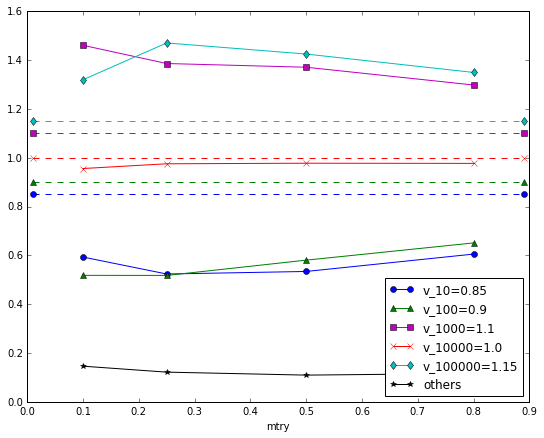

In [13]:
styles = ['bo-', 'g^-', 'ms-', 'rx-', 'cd-', 'k*-']
norm_importance_by_mtry.unstack()['normalized_imp'].plot(style=styles,  xlim=(0,0.9))
for s,y in zip(styles,[0.85, 0.9, 1.1, 1.0, 1.15]):    
    pyplot.plot([0.01,0.89], [y,y], s + '-')
pyplot.show()